In [ ]:
# PM 10

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt #plotting
import seaborn as sns #for beatiful visualization

In [3]:
# reading csv
PM10= pd.read_csv(r'C:\\Users\\61423\\OneDrive\\Desktop\\SEM 3\\DVN\\AT3\\smoke-air quality\\PM10(NSW).csv')
#PM10

In [6]:
from datetime import datetime, date
PM10["Date"]= pd.to_datetime(PM10["Date"]).dt.normalize()
#PM10["Date"]

In [7]:
# Taking average of PM_2.5 index for all regions in NSW 
PM10['PM10_avg'] = PM10.iloc[:,1:].mean(axis=1)
PM10.head()

,Date,RANDWICK PM10,ROZELLE PM10,LINDFIELD PM10,LIVERPOOL PM10,BRINGELLY PM10,CHULLORA PM10,EARLWOOD PM10,WYONG PM10,WALLSEND PM10,...,LIVERPOOL SWAQS PM10,MACQUARIE PARK PM10,NARRABRI PM10,GUNNEDAH PM10,ARMIDALE PM10,ORANGE PM10,BRADFIELD HIGHWAY PM10,KATOOMBA PM10,ROUSE HILL PM10,PM10_avg
0,2001-12-31,NaN,NaN,26.1,28.1,31.6,NaN,31.8,NaN,26.9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26.771429
1,2002-01-31,21.5,NaN,20.3,28.6,28.3,NaN,28.7,NaN,24.4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24.720000
2,2002-02-28,17.2,NaN,13.7,16.5,14.9,NaN,17.7,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.992857
3,2002-03-31,NaN,NaN,16.3,18.8,17.2,NaN,20.2,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.225000
4,2002-04-30,15.6,NaN,14.1,18.5,14.4,NaN,18.0,NaN,15.4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.040000


In [8]:
# set Date to datetimeindex
PM10.set_index('Date', inplace=True)
PM10.index = pd.to_datetime(PM10.index)

In [9]:
PM10_avg = PM10.resample('M').agg({'PM10_avg':'max'}) # monthly data conversion
PM10_avg.head()

,PM10_avg
Date,
2001-12-31,26.771429
2002-01-31,24.720000
2002-02-28,14.992857
2002-03-31,19.225000
2002-04-30,17.040000


In [10]:
# Naming the index column
PM10_avg.index.name= "Date"

# Converting the index into a column
PM10_MONTHLY_avg= PM10_avg.reset_index()
print("modified: ")
print(PM10_MONTHLY_avg)

modified: 
          Date   PM10_avg
0   2001-12-31  26.771429
1   2002-01-31  24.720000
2   2002-02-28  14.992857
3   2002-03-31  19.225000
4   2002-04-30  17.040000
..         ...        ...
212 2019-08-31  20.798000
213 2019-09-30  21.539216
214 2019-10-31  31.102000
215 2019-11-30  51.224490
216 2019-12-31  60.778000

[217 rows x 2 columns]


In [11]:
# Save the year+months ozone data into a csv
PM10_MONTHLY_avg.to_csv("PM10_MONTHLY.csv")

In [12]:
from matplotlib import pyplot
#plt.style.use('ggplot')
#plt.style.use('seaborn-white')

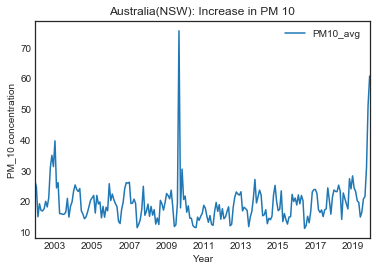

In [24]:
PM10_MONTHLY_avg.plot(x= "Date", y="PM10_avg")

fig= plt.gcf()
#fig.savefig("ozone_monthly.png")
pyplot.xlabel("Year")
pyplot.ylabel('PM_10 concentration')
pyplot.title("Australia(NSW): Increase in PM 10")
fig.savefig("PM10_MONTHLY.png")
pyplot.show()


In [16]:
# Define range of dates for the plot
mask = (PM10_MONTHLY_avg['Date'] > '2017-12-31')

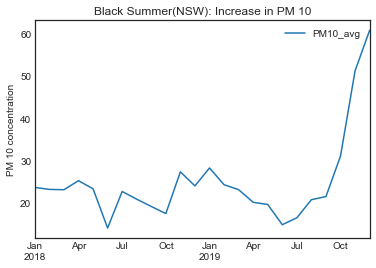

In [25]:
PM10_MONTHLY_avg.loc[mask].plot(x= "Date", y="PM10_avg")

fig= plt.gcf()
#fig.savefig("ozone_monthly.png")
pyplot.xlabel("")
pyplot.ylabel('PM 10 concentration')
pyplot.title("Black Summer(NSW): Increase in PM 10")
fig.savefig("PM_10_2019.png")
pyplot.show()

# yealy data

In [19]:
PM10_yearly = PM10.resample('Y').agg({'PM10_avg':'max'})
PM10_yearly.head()

,PM10_avg
Date,
2001-12-31,26.771429
2002-12-31,34.980000
2003-12-31,39.692308
2004-12-31,25.350000
2005-12-31,25.744444


In [20]:
# Naming the index column
PM10_yearly.index.name= "Date"

# Converting the index into a column
PM10_yearly= PM10_yearly.reset_index()
print("modified: ")
print(PM10_yearly)

modified: 
         Date   PM10_avg
0  2001-12-31  26.771429
1  2002-12-31  34.980000
2  2003-12-31  39.692308
3  2004-12-31  25.350000
4  2005-12-31  25.744444
5  2006-12-31  26.115000
6  2007-12-31  26.228571
7  2008-12-31  20.321739
8  2009-12-31  75.526087
9  2010-12-31  21.713043
10 2011-12-31  19.650000
11 2012-12-31  23.057895
12 2013-12-31  27.125000
13 2014-12-31  25.204651
14 2015-12-31  23.430233
15 2016-12-31  23.816667
16 2017-12-31  24.402326
17 2018-12-31  27.368085
18 2019-12-31  60.778000


In [21]:
# ADD year colum to it
PM10_yearly['year'] = PM10_yearly['Date'].apply(lambda x: x.strftime('%Y'))
print(PM10_yearly)

         Date   PM10_avg  year
0  2001-12-31  26.771429  2001
1  2002-12-31  34.980000  2002
2  2003-12-31  39.692308  2003
3  2004-12-31  25.350000  2004
4  2005-12-31  25.744444  2005
5  2006-12-31  26.115000  2006
6  2007-12-31  26.228571  2007
7  2008-12-31  20.321739  2008
8  2009-12-31  75.526087  2009
9  2010-12-31  21.713043  2010
10 2011-12-31  19.650000  2011
11 2012-12-31  23.057895  2012
12 2013-12-31  27.125000  2013
13 2014-12-31  25.204651  2014
14 2015-12-31  23.430233  2015
15 2016-12-31  23.816667  2016
16 2017-12-31  24.402326  2017
17 2018-12-31  27.368085  2018
18 2019-12-31  60.778000  2019


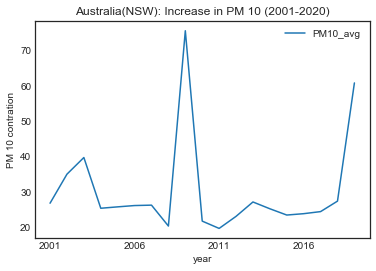

In [22]:
PM10_yearly.plot(x= "year", y="PM10_avg")

fig= plt.gcf()
#fig.savefig("ozone_yearly.png")
#pyplot.xlabel("Year")
pyplot.ylabel('PM 10 contration')
pyplot.title("Australia(NSW): Increase in PM 10 (2001-2020)")
fig.savefig("PM 10.png")
pyplot.show()


In [23]:
# Save the year+months ozone data into a csv
PM10_yearly.to_csv("PM_10_2001-2019.csv")

# COmibining ozone, PM 2.5, PM10 AND Overall air quality

In [26]:
# reading csv
combine_air= pd.read_csv(r'C:\\Users\\61423\\OneDrive\\Desktop\\SEM 3\\DVN\\AT3\\smoke-air quality\\combine air quality.csv')
combine_air

,Date (PM_2_2001-2019.csv),Date (ozone_yearly_2001-2019.csv),F1 (ozone_yearly_2001-2019.csv),Number of Records,PM10_avg,PM2_avg,ozone_avg,year (ozone_yearly_2001-2019.csv),year
0,31/12/2001,31/12/2001,0,1,26.771429,15.814286,2.256250,2001,1/01/2001
1,31/12/2002,31/12/2002,1,1,34.980000,13.660000,2.375000,2002,1/01/2002
2,31/12/2003,31/12/2003,2,1,39.692308,13.766667,2.133333,2003,1/01/2003
3,31/12/2004,31/12/2004,3,1,25.350000,9.687500,2.200000,2004,1/01/2004
4,31/12/2005,31/12/2005,4,1,25.744444,9.000000,2.305556,2005,1/01/2005
5,31/12/2006,31/12/2006,5,1,26.115000,9.328571,2.294737,2006,1/01/2006
6,31/12/2007,31/12/2007,6,1,26.228571,8.133333,2.478947,2007,1/01/2007
7,31/12/2008,31/12/2008,7,1,20.321739,8.642857,2.155556,2008,1/01/2008
8,31/12/2009,31/12/2009,8,1,75.526087,16.000000,2.529412,2009,1/01/2009
9,31/12/2010,31/12/2010,9,1,21.713043,7.085714,2.310526,2010,1/01/2010
